### 목표 : 오현, 민주 얼굴을 분류하는 모델 만들기!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image   # PIL(pillow) : 이미지를 로드해주는 모듈

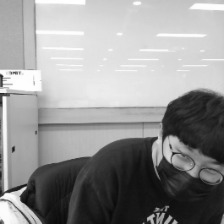

In [2]:
# 이미지를 가져와서 흑백으로 변환
# convert : L -> 흑백, RGB -> 컬러
img = Image.open("data/Class 1-samples/0.jpg").convert('L')
img

#### 이미지 데이터를 numpy 배열로(수치 데이터)로 변환
- 기계가 인식할 수 있도록 이미지 데이터의 픽셀값들을 수치로 변환시켜주기!
- 기존 학습용 데이터들은 모두 수치로 변환되어져 있던 상태!
- 가로, 세로 픽셀 수 만큼 수치로 변환

In [3]:
img_array = np.array(img)
img_array

array([[164, 165, 166, ..., 194, 192, 190],
       [164, 165, 166, ..., 192, 191, 189],
       [165, 165, 165, ..., 195, 195, 194],
       ...,
       [108, 107, 114, ..., 108, 151, 156],
       [ 71,  82, 110, ..., 122, 151, 160],
       [ 64,  81, 111, ..., 141, 153, 157]], dtype=uint8)

In [4]:
img_array.shape

(224, 224)

In [5]:
!pip install tqdm

In [6]:
# 반복문(for) 실행시 어느정도 실행되고 있는지 %로 알려주는 라이브러리
from tqdm import tqdm

In [7]:
# 데이터 셋 구성하기
class1_list = []    # 오현 데이터가 저장될 자리
class2_list = []    # 민주 데이터가 저장될 자리

for i in tqdm(range(0, 200, 1)) :
    # 1.오현 데이터 작업
    # 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후 img1 변수에 담아주기
    img1 = Image.open("data/Class 1-samples/"+ str(i) +".jpg").convert('L')
    # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
    img_array1 = np.array(img1)
    # numpy 배열 데이터를 빈 리스트에 하나씩 담아주기!
    class1_list.append(img_array1)
    
    # 2. 민주 데이터 작업
    img2 = Image.open("data/Class 2-samples/"+ str(i) +".jpg").convert('L')
    img_array2 = np.array(img2)
    class2_list.append(img_array2)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 671.75it/s]


In [8]:
class1_list

[array([[164, 165, 166, ..., 194, 192, 190],
        [164, 165, 166, ..., 192, 191, 189],
        [165, 165, 165, ..., 195, 195, 194],
        ...,
        [108, 107, 114, ..., 108, 151, 156],
        [ 71,  82, 110, ..., 122, 151, 160],
        [ 64,  81, 111, ..., 141, 153, 157]], dtype=uint8),
 array([[166, 166, 166, ..., 194, 192, 189],
        [164, 164, 165, ..., 192, 190, 188],
        [164, 164, 165, ..., 195, 194, 193],
        ...,
        [104, 119, 165, ..., 157, 159, 156],
        [ 80,  91, 119, ..., 156, 159, 158],
        [ 62,  79, 116, ..., 160, 159, 158]], dtype=uint8),
 array([[166, 166, 166, ..., 195, 192, 190],
        [165, 166, 166, ..., 194, 193, 191],
        [165, 165, 166, ..., 195, 195, 194],
        ...,
        [105, 121, 181, ..., 158, 154, 155],
        [ 79,  90, 129, ..., 155, 160, 156],
        [ 61,  86, 114, ..., 152, 164, 156]], dtype=uint8),
 array([[164, 165, 166, ..., 195, 193, 190],
        [164, 165, 166, ..., 194, 192, 190],
        [164, 16

In [9]:
# 리스트 자체도 numpy배열로 변환
# 사진 하나하나도 numpy배열로, 이를 담고있는 리스트도 numpy배열로 변환시켜줘야함
class1_numpy = np.array(class1_list)
class2_numpy = np.array(class2_list)

In [10]:
class1_numpy

array([[[164, 165, 166, ..., 194, 192, 190],
        [164, 165, 166, ..., 192, 191, 189],
        [165, 165, 165, ..., 195, 195, 194],
        ...,
        [108, 107, 114, ..., 108, 151, 156],
        [ 71,  82, 110, ..., 122, 151, 160],
        [ 64,  81, 111, ..., 141, 153, 157]],

       [[166, 166, 166, ..., 194, 192, 189],
        [164, 164, 165, ..., 192, 190, 188],
        [164, 164, 165, ..., 195, 194, 193],
        ...,
        [104, 119, 165, ..., 157, 159, 156],
        [ 80,  91, 119, ..., 156, 159, 158],
        [ 62,  79, 116, ..., 160, 159, 158]],

       [[166, 166, 166, ..., 195, 192, 190],
        [165, 166, 166, ..., 194, 193, 191],
        [165, 165, 166, ..., 195, 195, 194],
        ...,
        [105, 121, 181, ..., 158, 154, 155],
        [ 79,  90, 129, ..., 155, 160, 156],
        [ 61,  86, 114, ..., 152, 164, 156]],

       ...,

       [[165, 165, 165, ..., 194, 192, 190],
        [165, 165, 165, ..., 193, 192, 191],
        [165, 165, 165, ..., 195, 195, 194

In [11]:
# 문제 데이터 생성
# concatenate : 두 배열을 순서대로 붙여주는 명령
data = np.concatenate((class1_numpy, class2_numpy))

In [12]:
data.shape

(400, 224, 224)

In [13]:
# 정답 데이터 생성(문제와 정답의 순서를 일정하게 맞춰줘야 함)
# 0 : 오현 데이터의 정답, 1 : 민주 데이터의 정답
target = np.array([0]*200 + [1]*200)

In [14]:
target.shape

(400,)

In [15]:
# 학습, 평가 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10
                                                    )

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 224, 224)
(80, 224, 224)
(320,)
(80,)


### 신경망 모델링
 - 1. 신경망 구조 설계
 - 2. 학습 및 평가방법 설정
 - 3. 학습 및 시각화
 - 4. 평가

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 라이브러리

In [18]:
model = Sequential()

# Flatten 명령을 통해 한번에 바로 이미지 데이터를 1차원으로 펴서 신경망에 넣어줌
model.add(Flatten(input_shape=(224,224)))

model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               25088500  
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 25,269,001
Trainable params: 25,269,001
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc']
             )

In [24]:
# 3. 학습
h = model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=256
             )

# validation_split : 자동으로 train 데이터에서 검증용 데이터셋을 분리시켜주는 명령
# 주의점 -> 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬되어있는 데이터에는 사용 불가

Epoch 1/50
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/50
1/1 [=========================

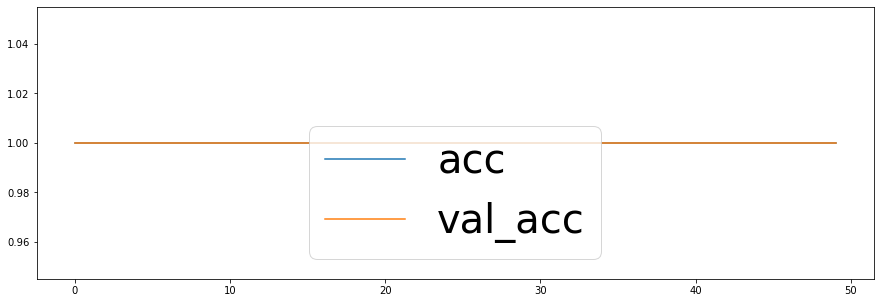

In [31]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'],
         label='acc'
        )

plt.plot(h.history['val_acc'],
         label='val_acc'
        )

plt.legend(prop={'size':40}, loc="lower center")
plt.show()

In [32]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]